In [35]:
import torch
import numpy as np
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import transforms as T
import matplotlib.pyplot as plt
from glob import glob
import cv2
import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2
import random
from tqdm.notebook import tqdm
import os





In [36]:
data_path = 'data/new'

imgs_path = glob(data_path + '/images/' + '*.jpg')


In [37]:
masks_path = list(data_path + '/masks/' + imgs_path[i].split('/')[-1][:-3] + 'bmp' for i in range(len(imgs_path)))

In [38]:
print(imgs_path)
print(masks_path)

['data/new/images/d_r_14_.jpg', 'data/new/images/d_r_1_.jpg', 'data/new/images/d_r_18_.jpg', 'data/new/images/d_r_4_.jpg', 'data/new/images/d_r_5_.jpg', 'data/new/images/d_r_17_.jpg', 'data/new/images/d_r_3_.jpg']
['data/new/masks/d_r_14_.bmp', 'data/new/masks/d_r_1_.bmp', 'data/new/masks/d_r_18_.bmp', 'data/new/masks/d_r_4_.bmp', 'data/new/masks/d_r_5_.bmp', 'data/new/masks/d_r_17_.bmp', 'data/new/masks/d_r_3_.bmp']


In [47]:
images = list(cv2.imread(i) for i in imgs_path)
masks = list(cv2.imread(i) for i in masks_path)

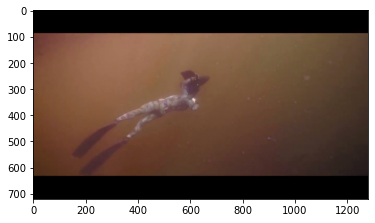

In [48]:
plt.imshow(images[4])

In [55]:
image_size = 128
transform = A.Compose([
    A.CenterCrop(height=image_size,width=image_size,p=1),
    ToTensorV2()])
img_dict = transform(image=images[0])
img_0 = img_dict['image']

In [53]:
print()

{'image': tensor([[[120, 119, 118,  ...,  92,  89,  88],
         [119, 118, 115,  ...,  87,  82,  83],
         [119, 118, 117,  ..., 134, 139, 124],
         ...,
         [ 63,  65,  65,  ...,  31,  31,  31],
         [ 63,  65,  65,  ...,  31,  29,  30],
         [ 63,  65,  65,  ...,  30,  29,  30]],

        [[111, 110, 108,  ...,  92,  90,  89],
         [110, 109, 108,  ...,  87,  83,  84],
         [110, 109, 107,  ..., 134, 140, 125],
         ...,
         [ 55,  57,  57,  ...,  24,  25,  26],
         [ 55,  57,  57,  ...,  24,  24,  27],
         [ 55,  57,  57,  ...,  25,  25,  27]],

        [[ 24,  23,  24,  ...,  28,  24,  21],
         [ 23,  22,  23,  ...,  23,  17,  16],
         [ 23,  22,  23,  ...,  70,  74,  57],
         ...,
         [ 25,  27,  27,  ...,  29,  26,  25],
         [ 25,  27,  27,  ...,  29,  25,  23],
         [ 25,  27,  27,  ...,  27,  24,  23]]], dtype=torch.uint8)}
